In [35]:
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [36]:
data=pd.read_excel('/content/updated_dataset1.xlsx')

In [37]:
data.head()

,ds,y,date,is_holiday,temp,weather_state,weekday
0,2018-04-07 01:00:00,20,2018-04-07,0,22.0,1,0
1,2018-04-07 02:00:00,5,2018-04-07,0,21.0,1,0
2,2018-04-07 03:00:00,1,2018-04-07,0,23.0,1,0
3,2018-04-07 04:00:00,0,2018-04-07,0,20.0,1,0
4,2018-04-07 05:00:00,6,2018-04-07,0,20.0,1,0


In [38]:
# Split data into training and validation sets
train_size = int(len(data) * 0.8)
train = data[:train_size]
validation = data[train_size:]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpi5t4b5dg/j7j_4cry.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi5t4b5dg/e6z3f992.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74295', 'data', 'file=/tmp/tmpi5t4b5dg/j7j_4cry.json', 'init=/tmp/tmpi5t4b5dg/e6z3f992.json', 'output', 'file=/tmp/tmpi5t4b5dg/prophet_modelgyob5sg4/prophet_model-20240815220736.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:07:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:07:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MSE: 74085.59061567485


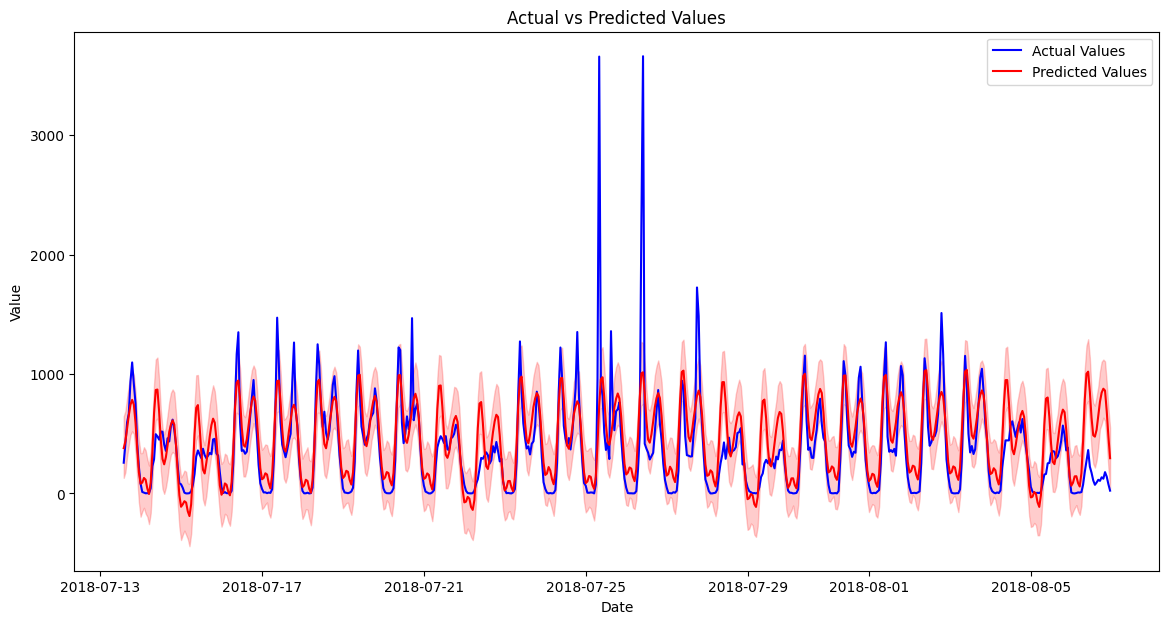

In [40]:
model = Prophet(yearly_seasonality=True,
                    weekly_seasonality=True,
                    daily_seasonality=True,
                    changepoint_prior_scale=.002)
model.add_regressor('is_holiday')
model.add_regressor('temp')
model.add_regressor('weather_state')
model.fit(train)

# Corrected typo from 'make__period' to 'periods'
periods = len(validation)
future_validation = model.make_future_dataframe(periods=periods, freq='H', include_history=False)
# Assigning the validation set regressors to the future dataframe
future_validation['is_holiday'] = validation['is_holiday'].values
future_validation['temp'] = validation['temp'].values
future_validation['weather_state'] = validation['weather_state'].values
# Making predictions
forecast_validation = model.predict(future_validation)
actuals = validation['y'].values
predictions = forecast_validation['yhat'].values
# Calculating MSE
mse = mean_squared_error(actuals, predictions)
print(f'MSE: {mse}')
# Plotting the results
lower_bound = forecast_validation['yhat_lower'].values
upper_bound = forecast_validation['yhat_upper'].values
plt.figure(figsize=(14, 7))
plt.plot(validation['ds'], actuals, label='Actual Values', color='blue')
plt.plot(forecast_validation['ds'], predictions, label='Predicted Values', color='red')
plt.fill_between(forecast_validation['ds'], lower_bound, upper_bound, color='red', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [46]:
real_time_data = pd.DataFrame({
    'ds': ['2019-05-11 02:00:00'],  # Date and time
    'temp': [27.1],  # Temperature
    'weather_state': [1]  # Weather State
})
real_time_data['is_holiday'] = 0
real_time_data['ds'] = pd.to_datetime(real_time_data['ds'])
forecast = model.predict(real_time_data)
predicted_value = round(forecast['yhat'].values[0])
lower_bound = round(forecast['yhat_lower'].values[0])
upper_bound = round(forecast['yhat_upper'].values[0])

print(f"Predicted Value: {predicted_value}")
print(f"Prediction Interval: ({lower_bound}, {upper_bound})")

Predicted Value: 1353
Prediction Interval: (1097, 1598)
